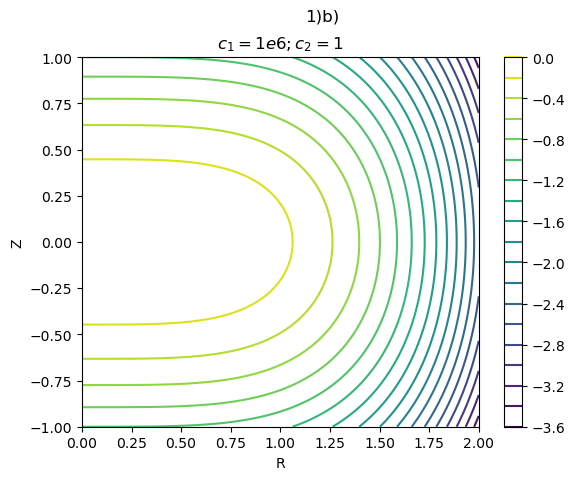

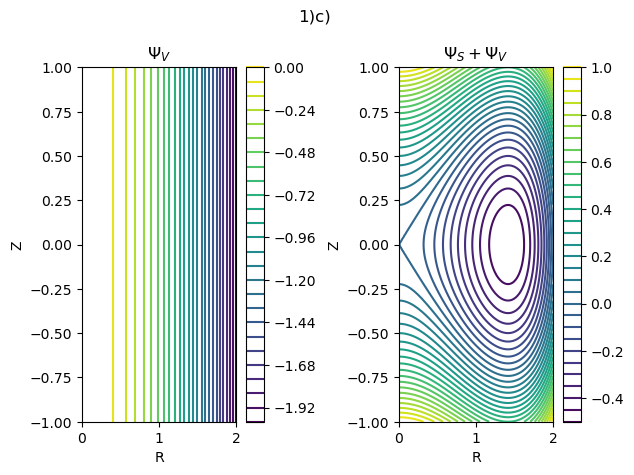

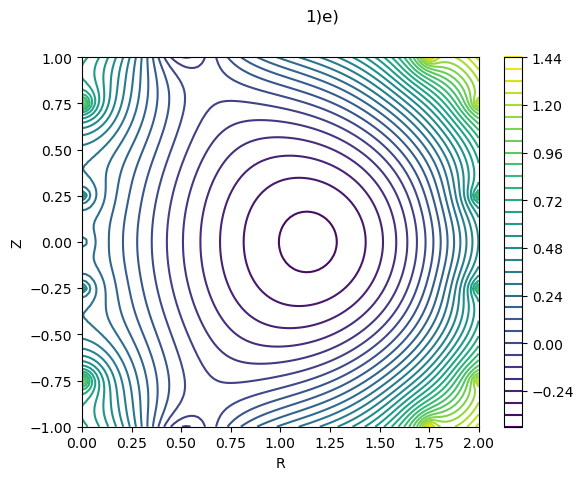

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

R = np.linspace(0, 2, 100)
Z = np.linspace(-1, 1, 100)

R, Z = np.meshgrid(R, Z)

mu0 = 4 * np.pi * 10**-7
c1 = 1e6
c2 = 1

PsiS = ((R**4) * -mu0 * c1 / 8) - (c2 * Z**2)

# Q1b
f1 = plt.figure()
f1.suptitle('1)b)')
ax = f1.add_subplot(111)
ax.set_title('$c_1 = 1e6; c_2 = 1$')
c = ax.contour(R, Z, PsiS, 20)
plt.colorbar(c)
ax.set_xlabel('R')
ax.set_ylabel('Z')

# Q1c
A1 = 1/8
A2 = 1
A3 = -1/2

PsiV = A3 * R**2
PsiS = ((R**4) * A1) + (A2 * Z**2)

f2 = plt.figure()
f2.suptitle('1)c)')
ax = f2.add_subplot(121)
c = ax.contour(R, Z, PsiV, 30)
plt.colorbar(c)
ax.set_xlabel('R')
ax.set_ylabel('Z')
ax.set_title('$\Psi_V$')
ax = f2.add_subplot(122)
c = ax.contour(R, Z, PsiS + PsiV, 30)
plt.colorbar(c)
ax.set_title('$\Psi_S + \Psi_V$')
ax.set_xlabel('R')
ax.set_ylabel('Z')
plt.tight_layout()

# Q1e
R0s = [    0,    0,     0,    0,     0,  1.75,   1.75,   2.0,   2.0,   2.0,   2.0,   0.5,  0.5] 
Z0s = [    0, 0.75, -0.75, 0.25, -0.25,   1.0,   -1.0,  0.25, -0.25,  0.75, -0.75, -1.15, 1.15]
cs =  [-0.05, -0.2,  -0.2, -0.1,  -0.1, -0.15,  -0.15, -0.10, -0.10, -0.10, -0.10,   0.5,  0.5] 

Psi = np.sum(np.dstack([PsiS, PsiV] + [c * 0.5 * np.log((R - R0)**2 + (Z - Z0)**2) for c, R0, Z0 in zip(cs, R0s, Z0s)]), axis=-1)

f1 = plt.figure()
f1.suptitle('1)e)')
ax = f1.add_subplot(111)
c = ax.contour(R, Z, Psi, 30)
plt.colorbar(c)
ax.set_xlabel('R')
ax.set_ylabel('Z')

plt.show()